# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd


** Import visualization libraries and set %matplotlib inline. **

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [49]:
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**top 5 zipcodes for 911 calls?**

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**top 5 townships (twp) for 911 calls?**

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Number of unique title codes**

In [8]:
ls=df['title'].unique()
count=len(ls)
#we can also use nunique for this 
df['title'].nunique()

110

## Creating new features

**Making A new column Reason using title column which contains the reason before ":"**

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

**most common Reason for a 911 call based off of this new column**

In [10]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason', ylabel='count'>

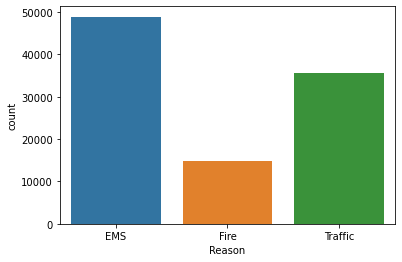

In [51]:
sns.countplot(x=df['Reason'])

In [12]:
type(df['timeStamp'].iloc[0])

str

**converting the column from strings to DateTime objects.**

In [53]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
time=df['timeStamp'].iloc[0]
print(time.day,"/",time.month,"/",time.year)
print(time.dayofweek)

10 / 12 / 2015
3


In [54]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [55]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

**creating a new column 'Day of week' to classify each date value according to the day of week**

In [56]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df['Day of week']=df['Day of Week'].map(dmap)
df['Day of week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of week, dtype: int64

<AxesSubplot:xlabel='Day of week', ylabel='count'>

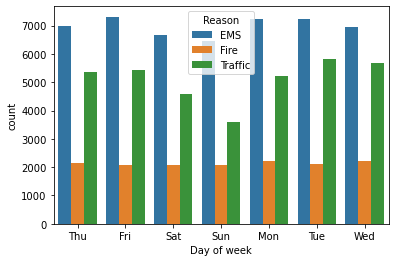

In [57]:
sns.countplot(x=df['Day of week'],data=df,hue='Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

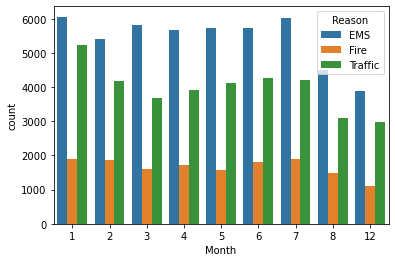

In [31]:
sns.countplot(x=df['Month'],data=df,hue='Reason')

**We have noticed that some of the months are missing in the data so we will now try to fill those value using linear data according to the data we have**

**creating a new dataframe where each column of the new dataframe is filled with the count of the values for each month**

In [35]:
mymonth = df.groupby('Month').count()
mymonth.head(100)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Day of week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


**simple plot off of the dataframe indicating the count of calls per month.**

In [52]:
mymonth['twp'].iplot()

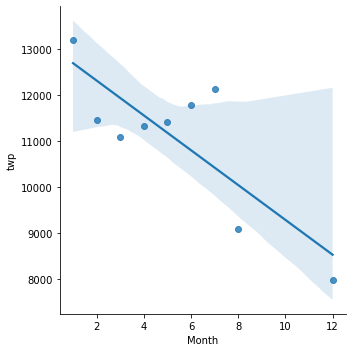

In [93]:
sns.lmplot(x='Month',y='twp',data=mymonth.reset_index())

In [101]:
df['date']=df['timeStamp'].apply(lambda time: time.date() )
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

In [105]:
bydate=df.groupby('date').count()['twp']
bydate.iplot()

**Now creating plots for the date vs count of reason=="EMS"**

In [106]:
df[df['Reason']=='EMS'].groupby('date').count()['twp'].iplot()

**Now creating plots for the date vs count of reason=="Traffic"**

In [72]:
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].iplot()

**Now creating plots for the date vs count of reason=="Fire"**

In [73]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].iplot()

In [80]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,840,838,887,917,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,800,789,903,872,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474


**Heatmap and Clustermap for DataFrame that shows the Month as the column.**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

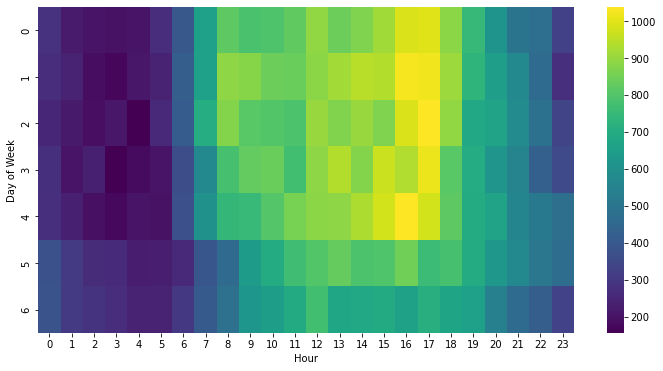

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

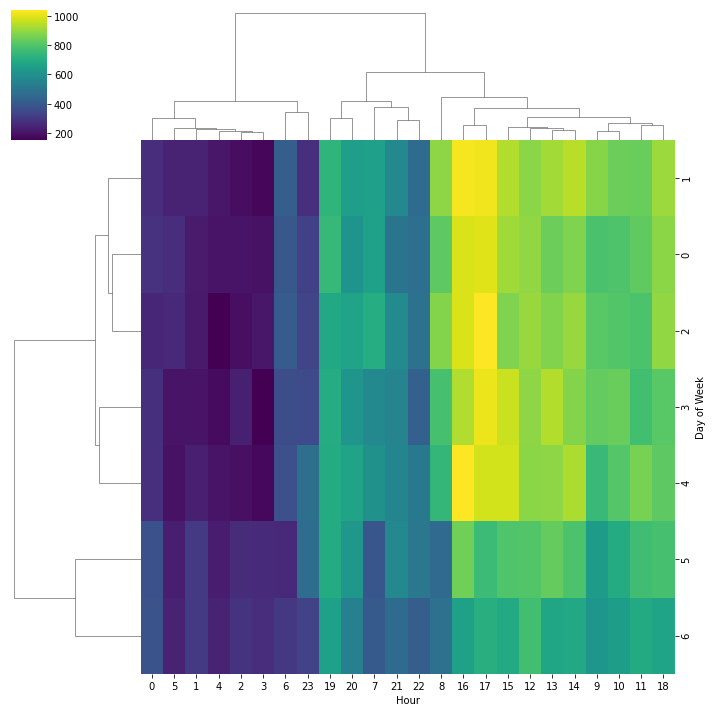

In [87]:
sns.clustermap(dayHour,cmap='viridis')

**Heatmap and Clustermap for DataFrame that shows the Month as the column.**

In [89]:
myMonth=df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of week'>

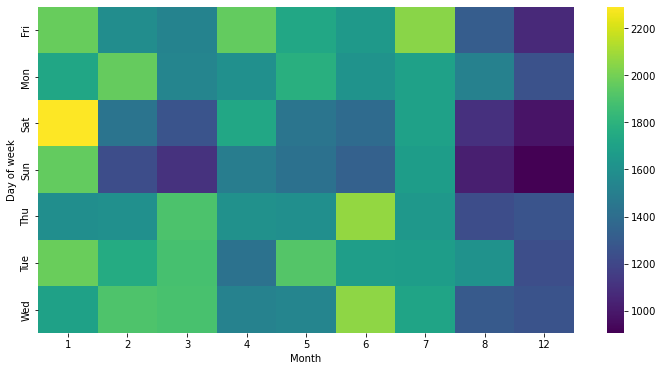

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(myMonth,cmap='viridis')

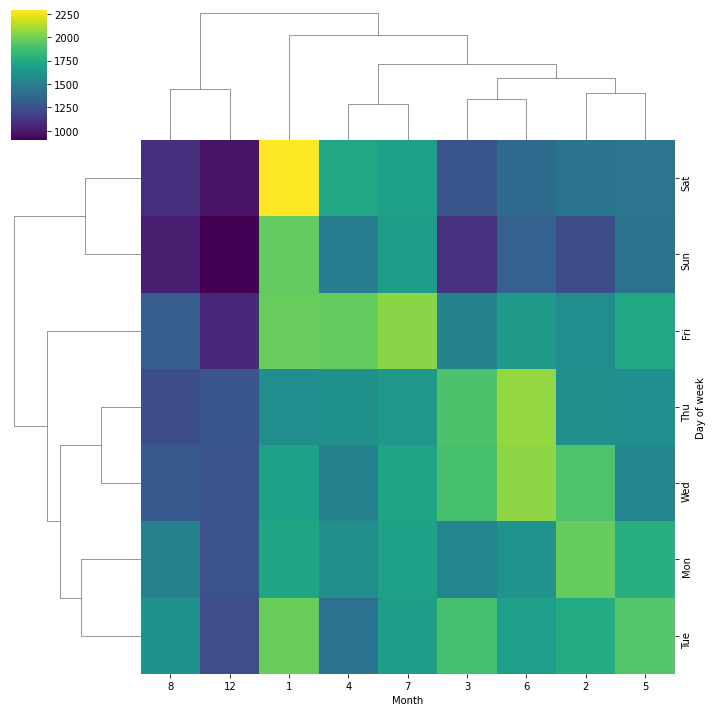

In [92]:
sns.clustermap(myMonth,cmap='viridis')